<a href="https://colab.research.google.com/github/NiloofarSeyf/Data-scieince-Projects/blob/main/Maskclassification99%25_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing dependencies
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
from keras.applications import vgg16
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
!pip install split-folders
import splitfolders
import itertools
%matplotlib inline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Loading and splitting data into train, tvalidatio and test

splitfolders.ratio('/content/dataset', output='/content/output', seed=123, ratio=(.7,.15,.15), group_prefix=None)

Copying files: 1376 files [00:00, 3880.86 files/s]


In [17]:
#Data preparation

train_path = '/content/output/train'
valid_path = '/content/output/val'
test_path ='/content/output/test'

In [30]:
train_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=30)
valid_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=30)
test_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224),class_mode = 'binary' ,batch_size=30)

Found 962 images belonging to 2 classes.
Found 205 images belonging to 2 classes.
Found 209 images belonging to 2 classes.


In [23]:
import os
dir = os.listdir('/content/output/test')
print(dir)

['mask', '.ipynb_checkpoints', 'withoutmaskk']


In [29]:

#file_path = ('/content/output/val/.ipynb_checkpoints')
#os.rmdir(file_path)

In [31]:
base_model = vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [32]:
# iterate through its layers and lock them to make them not trainable with this code
for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [33]:
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model

# use “get_layer” method to save the last layer of the network
# save the output of the last layer to be the input of the next layer
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output

# flatten the classifier input which is output of the last layer of VGG16 model
x = Flatten()(last_output)

# add FC layer, which has 64 units and relu activation 
x = Dense(64, activation='relu', name='FC_2')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
# add our new softmax layer with 2 hidden units
x = Dense(2, activation='softmax', name='softmax')(x)

# instantiate a new_model using keras’s Model class
new_model = Model(inputs=base_model.input, outputs=x)

# print the new_model summary
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [34]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.VGG1650epochs.hdf5', verbose=1, save_best_only=True)
#earlystopping = EarlyStopping(monitor='val_loss', min_delta = 0, verbose=1, patience=5)
callbacks=[checkpointer]

new_model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = new_model.fit(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=2, epochs=50, verbose=2, callbacks = callbacks)

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.07209, saving model to model.VGG1650epochs.hdf5
4/4 - 78s - loss: 1.0536 - accuracy: 0.6667 - val_loss: 1.0721 - val_accuracy: 0.8500 - 78s/epoch - 19s/step
Epoch 2/50

Epoch 2: val_loss improved from 1.07209 to 0.32773, saving model to model.VGG1650epochs.hdf5
4/4 - 76s - loss: 0.4253 - accuracy: 0.8500 - val_loss: 0.3277 - val_accuracy: 0.9167 - 76s/epoch - 19s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.32773
4/4 - 73s - loss: 0.2527 - accuracy: 0.8917 - val_loss: 0.3623 - val_accuracy: 0.9000 - 73s/epoch - 18s/step
Epoch 4/50

Epoch 4: val_loss improved from 0.32773 to 0.02977, saving model to model.VGG1650epochs.hdf5
4/4 - 74s - loss: 0.1782 - accuracy: 0.9167 - val_loss: 0.0298 - val_accuracy: 0.9833 - 74s/epoch - 18s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.02977
4/4 - 73s - loss: 0.1503 - accuracy: 0.9417 - val_loss: 0.1539 - val_accuracy: 0.9667 - 73s/epoch - 18s/step
Epoch 6/50

Epoch 6: val_l

In [35]:
#Accuracy on validation data

scores = new_model.evaluate(valid_batches, batch_size=30, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

7/7 [==============================] - 84s 12s/step - loss: 0.0161 - accuracy: 0.9902

Test result: 99.024 loss: 0.016


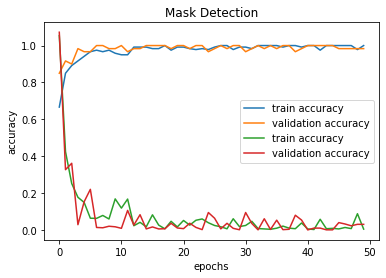

In [36]:
plt.plot(history.history["accuracy"], label = "train accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.plot(history.history["loss"], label = "train accuracy")
plt.plot(history.history["val_loss"], label = "validation accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Mask Detection")
plt.show()

In [38]:
#Evaluating model on test data

#converting our dataset into tensors
def load_dataset(path):
    data = load_files(path)
    paths = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']))
    return paths, targets


In [40]:
from sklearn.datasets import load_files
from keras.utils import np_utils

#it is time to evaluating model on almost 1000 imagesof dogs and cats
test_files, test_targets = load_dataset('/content/output/test')

In [41]:
from keras.preprocessing import image 
from keras.utils import img_to_array

from keras.applications.vgg16 import preprocess_input
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = keras.utils.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = keras.utils.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

test_tensors = preprocess_input(paths_to_tensor(test_files))

100%|██████████| 209/209 [00:00<00:00, 234.02it/s]


In [46]:
#Evaluate and print test loss and test accuracy

print('\nTesting loss: {:.4f}\nTesting accuracy: {:.4f}'.format(*new_model.evaluate(test_tensors, test_targets)))

7/7 [==============================] - 85s 12s/step - loss: 0.0063 - accuracy: 1.0000

Testing loss: 0.0063
Testing accuracy: 1.0000


In [51]:
#Lets test the model on one of the images with mask

import cv2
test_image = keras.utils.load_img('/content/output/test/mask/108-with-mask.jpg')

test_image = cv2.imread('/content/output/test/mask/108-with-mask.jpg')
test_image = cv2.resize(test_image,(224,224))
target_size = (224, 224) 

#Turning test image to array

test_image = keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
Result = new_model.predict(test_image)
print(Result)

max = np.argmax(Result)
if max == 0:
  print('The prerson has a mask')
 
if max == 1:
   print('The person doesnt have a mask')

1/1 [==============================] - 0s 418ms/step
[[1.0000000e+00 2.9439429e-08]]
The prerson has a mask


In [52]:
#Lets test the model on one of the images without mask

import cv2
test_image = keras.utils.load_img('/content/output/test/withoutmaskk/110.jpg')

test_image = cv2.imread('/content/output/test/withoutmaskk/110.jpg')
test_image = cv2.resize(test_image,(224,224))
target_size = (224, 224) 

#Turning test image to array

test_image = keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
Result = new_model.predict(test_image)
print(Result)

#class 0 meaans having mask
#class 1 means without mask

max = np.argmax(Result)
if max == 0:
  print('The prerson has a mask')
 
if max == 1:
   print('The person doesnt have a mask')

1/1 [==============================] - 0s 407ms/step
[[0.03111053 0.9688895 ]]
The person doesnt have a mask


In [ ]:
# The End